<h1>Preparación y limpieza de de datos </h1>
<p>Proyecto aplicado - Rescindidos Funeraria La Aurora</´p>
<p>Carlos Felipe Cortés Cataño - Carlos Luis Mora Cañas </p>

Se transformará la información para asegurar que exista coherencia, accesibilidad y uniformidad

## Librerías y datos

In [216]:
import pandas as pd
from datetime import datetime


In [18]:
reporte = pd.read_csv("../data/consulta_promotora.csv", encoding='latin-1', low_memory=False)
reporte.head(3)

,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,Direccion,TipoPrograma,coordenadas,LocalidadVenta,EstadoActual,FechaRescindido,Estados,Cuotas,valorCuota_1,valorUltimaCuota,fechaIdealPago_CuotaCancelada,Observaciones,GestionesRecaudo
0,55,9/7/2018,Luz Dary Torres Cardona,53.0,7/12/1969,5.0,0.0,Calle 46 B - Carrera 9 # 99,Familiar,"{""pos"":{""latitud"":5.457571499999999,""longitud""...",La Dorada,Inactivo - Inactivo rescindido,2019-06-14 07:00:02.857,NaN,NaN,13600.0,13600.0,11/14/2018,NaN,NaN
1,56,9/7/2018,Leon Dario Cardona Velez,64.0,9/28/1958,0.0,0.0,Carrera 8 - Calle 17 # 28,Familiar,"{""pos"":{""latitud"":5.4540733,""longitud"":-74.668...",La Dorada,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,"[{""Estado"":""Inactivo - Influencia de seres cer...","[{""factura"":""AUOF-3815"",""valorTotalFacturaSinD...",7050.0,7050.0,7/6/2020,"[{""fechaIngreso"":""18\/05\/2020 "",""empleado"":""J...","[{""Estado"":""Exitosa - Gestión de recaudo exito..."
2,58,9/10/2018,Lucero Madelyne Castro Velasquez,52.0,8/5/1970,7.0,0.0,Calle 44 - Carrera 8 C # 14,Familiar,"{""pos"":{""latitud"":5.443969399999999,""longitud""...",La Dorada,Inactivo - Dificultad para ubicarlo,2020-09-01 05:00:00.000,"[{""Estado"":""Inactivo - Dificultad para ubicarl...","[{""factura"":""AUOF-1910"",""valorTotalFacturaSinD...",19100.0,20100.0,7/10/2020,"[{""fechaIngreso"":""30\/01\/2020 "",""empleado"":""J...","[{""Estado"":""Exitosa - Gestión de recaudo exito..."


## Valores duplicados

In [3]:
reporte.duplicated(subset=["CodigoPrograma", "EstadoActual"], keep="first").describe()

count     71248
unique        2
top       False
freq      70770
dtype: object

Se evidencia valores duplicados, eliminamos duplicados y reducimos el conjunto de datos de 70.787 a 70.320

In [124]:
data = reporte.copy().drop_duplicates(subset=["CodigoPrograma", "EstadoActual"], keep="first")
len(data)


70770

## Valores nulos y atipicos

Se identifican registros donde en el ultimo atributo se obtiene mucho texto y se traslada a la siguiente columna, dichos valores son eliminados

In [125]:
data = data.drop(data[data["TipoPrograma"].isna()].index)
len(data)


70505

Tipo de programa Empresarial, no es nuestro objetivo. El análisis se realizará en Familiar, debido a que empresarial no tiene un comportamiento similar según el experto de la organización.

[]

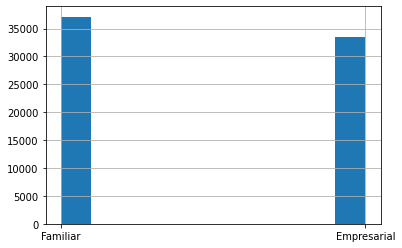

In [126]:
data["TipoPrograma"].hist().plot()

In [127]:
data = data[data["TipoPrograma"] != "Empresarial"]
len(data)

37113

In [128]:
data.isna().sum()

CodigoPrograma                       0
fechaSolicitud                       0
tomador                              0
edad                                 0
fechaNacimiento                      0
#_inscritos_activos                  0
#_mascotas_activas                   0
Direccion                            0
TipoPrograma                         0
coordenadas                      24771
LocalidadVenta                       0
EstadoActual                         0
FechaRescindido                  26198
Estados                          13269
Cuotas                            4694
valorCuota_1                         5
valorUltimaCuota                     4
fechaIdealPago_CuotaCancelada     4037
Observaciones                      615
GestionesRecaudo                 11644
dtype: int64

In [129]:
data[data["valorCuota_1"].isna()].head(3)

,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,Direccion,TipoPrograma,coordenadas,LocalidadVenta,EstadoActual,FechaRescindido,Estados,Cuotas,valorCuota_1,valorUltimaCuota,fechaIdealPago_CuotaCancelada,Observaciones,GestionesRecaudo
2507,4689,1/18/2019,Nury Mayela Parra Carvajal,37.0,1/3/1986,5.0,0.0,Carrera 1 - Calle 48 D # 54,Familiar,NaN,Manizales,Activo - Activo,NaN,"[{""Estado"":""Inactivo - Cambio de programa- ins...","[{""factura"":""CHEC-BW-MZL-10647"",""valorTotalFac...",NaN,NaN,12/10/2022,"[{""fechaIngreso"":""08\/01\/2020 "",""empleado"":""A...","[{""Estado"":""Exitosa - Gestión de recaudo exito..."
17296,53380,2/17/2013,Daniela Berrio Murillo,29.0,5/4/1993,2.0,0.0,Carrera 2 - Calle 5 A # 37,Familiar,NaN,Manizales,Activo - Activo,NaN,NaN,"[{""factura"":""SSURTE-BW-MZL-20998"",""valorTotalF...",NaN,NaN,2/1/2023,"[{""fechaIngreso"":""22\/08\/2020 "",""empleado"":""C...","[{""Estado"":""Exitosa - Gestión de recaudo exito..."
21492,71368,7/11/2003,Claudia Patricia Quijano Martinez,49.0,5/13/1973,2.0,0.0,Carrera 9 - Calle 1724 # sur,Familiar,NaN,Restrepo,Activo - Activo,NaN,NaN,"[{""factura"":""AUOF-30642"",""valorTotalFacturaSin...",NaN,NaN,12/28/2023,"[{""fechaIngreso"":""22\/10\/2020 "",""empleado"":""H...","[{""Estado"":""Exitosa - Gestión de recaudo exito..."


Obtenemos el promedio de la cuota teniendo en cuenta el número de inscritos y mascotas

In [130]:
replace = data.groupby(["#_inscritos_activos", "#_mascotas_activas"]).mean()[["valorCuota_1", "valorUltimaCuota"]].reset_index()
replace.head(3)

,#_inscritos_activos,#_mascotas_activas,valorCuota_1,valorUltimaCuota
0,0.0,0.0,193088.452305,193750.163752
1,0.0,1.0,25066.769505,25777.689544
2,0.0,2.0,27348.737864,29346.213592


In [131]:
replace = data[data["valorCuota_1"].isna()].drop(
    ["valorCuota_1", "valorUltimaCuota"], axis=1).merge(replace, on=["#_inscritos_activos", "#_mascotas_activas"])
replace


,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,Direccion,TipoPrograma,coordenadas,LocalidadVenta,EstadoActual,FechaRescindido,Estados,Cuotas,fechaIdealPago_CuotaCancelada,Observaciones,GestionesRecaudo,valorCuota_1,valorUltimaCuota
0,4689,1/18/2019,Nury Mayela Parra Carvajal,37.0,1/3/1986,5.0,0.0,Carrera 1 - Calle 48 D # 54,Familiar,NaN,Manizales,Activo - Activo,NaN,"[{""Estado"":""Inactivo - Cambio de programa- ins...","[{""factura"":""CHEC-BW-MZL-10647"",""valorTotalFac...",12/10/2022,"[{""fechaIngreso"":""08\/01\/2020 "",""empleado"":""A...","[{""Estado"":""Exitosa - Gestión de recaudo exito...",30605.576509,32473.260271
1,53380,2/17/2013,Daniela Berrio Murillo,29.0,5/4/1993,2.0,0.0,Carrera 2 - Calle 5 A # 37,Familiar,NaN,Manizales,Activo - Activo,NaN,NaN,"[{""factura"":""SSURTE-BW-MZL-20998"",""valorTotalF...",2/1/2023,"[{""fechaIngreso"":""22\/08\/2020 "",""empleado"":""C...","[{""Estado"":""Exitosa - Gestión de recaudo exito...",109294.935574,110882.297619
2,71368,7/11/2003,Claudia Patricia Quijano Martinez,49.0,5/13/1973,2.0,0.0,Carrera 9 - Calle 1724 # sur,Familiar,NaN,Restrepo,Activo - Activo,NaN,NaN,"[{""factura"":""AUOF-30642"",""valorTotalFacturaSin...",12/28/2023,"[{""fechaIngreso"":""22\/10\/2020 "",""empleado"":""H...","[{""Estado"":""Exitosa - Gestión de recaudo exito...",109294.935574,110882.297619
3,120467,1/15/2007,Rafael David Rueda Sanguino,46.0,3/8/1976,8.0,0.0,Carrera 16 A - Calle 6 # 05,Familiar,NaN,Manizales,Activo - Activo,NaN,"[{""Estado"":""Activo - Activo"",""fechainicio"":""20...","[{""factura"":""FEPE-4318"",""valorTotalFacturaSinD...",2/1/2023,"[{""fechaIngreso"":""07\/08\/2021 "",""empleado"":""A...","[{""Estado"":""Exitosa - Gestión de recaudo exito...",35921.463651,37935.357566
4,134334,5/20/2009,Maria Obeida Montoya Garcia,54.0,4/23/1968,6.0,0.0,Calle 51 G - Carrera 8 B # 15,Familiar,NaN,Manizales,Inactivo - Mala atención en el servicio,2022-07-23 05:00:00.000,"[{""Estado"":""Activo - Activo"",""fechainicio"":""20...","[{""factura"":""CHEC-BW-MZL-2900"",""valorTotalFact...",8/10/2022,"[{""fechaIngreso"":""04\/01\/2022 "",""empleado"":""P...",NaN,33127.401799,35085.821194


In [132]:
data = data.drop(data[data["valorCuota_1"].isna()].index)
data = pd.concat([data, replace], axis=0)
data[data["valorCuota_1"].isna()].head(3)


,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,Direccion,TipoPrograma,coordenadas,LocalidadVenta,EstadoActual,FechaRescindido,Estados,Cuotas,valorCuota_1,valorUltimaCuota,fechaIdealPago_CuotaCancelada,Observaciones,GestionesRecaudo


In [133]:
data = data.reset_index().drop("index", axis=1)

In [134]:
data.isna().sum()


CodigoPrograma                       0
fechaSolicitud                       0
tomador                              0
edad                                 0
fechaNacimiento                      0
#_inscritos_activos                  0
#_mascotas_activas                   0
Direccion                            0
TipoPrograma                         0
coordenadas                      24771
LocalidadVenta                       0
EstadoActual                         0
FechaRescindido                  26198
Estados                          13269
Cuotas                            4694
valorCuota_1                         0
valorUltimaCuota                     0
fechaIdealPago_CuotaCancelada     4037
Observaciones                      615
GestionesRecaudo                 11644
dtype: int64

In [135]:
data["coordenadas"][1]

'{"pos":{"latitud":5.4540733,"longitud":-74.66815350000002},"pov":{"heading":0,"pitch":0,"zoom":1}}'

Las coordenadas son un diccionario de palabras que contiene la posición con latitud y longitud, esto lo dividiremos en 2 atributos distintos

In [136]:
temp = data[["CodigoPrograma", "coordenadas"]].dropna()
temp = temp.set_index("CodigoPrograma")
temp["coordenadas"] = temp["coordenadas"].apply(
    lambda indice: indice.split(',"pov":')[0])
temp["coordenadas"] = temp["coordenadas"].apply(
    lambda indice: indice.replace('{"pos":{"latitud":', "").replace("}", "").replace('"longitud":', ""))
temp = temp["coordenadas"].str.split(",", expand=True).rename(
    columns={0: "latitud", 1: "longitud"}).reset_index()
data = data.merge(temp, on="CodigoPrograma",
                        how="left").drop("coordenadas", axis=1)
data.head(3)


,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,Direccion,TipoPrograma,LocalidadVenta,...,FechaRescindido,Estados,Cuotas,valorCuota_1,valorUltimaCuota,fechaIdealPago_CuotaCancelada,Observaciones,GestionesRecaudo,latitud,longitud
0,55,9/7/2018,Luz Dary Torres Cardona,53.0,7/12/1969,5.0,0.0,Calle 46 B - Carrera 9 # 99,Familiar,La Dorada,...,2019-06-14 07:00:02.857,NaN,NaN,13600.0,13600.0,11/14/2018,NaN,NaN,5.457571499999999,-74.67034009999998
1,56,9/7/2018,Leon Dario Cardona Velez,64.0,9/28/1958,0.0,0.0,Carrera 8 - Calle 17 # 28,Familiar,La Dorada,...,2020-07-23 05:00:00.000,"[{""Estado"":""Inactivo - Influencia de seres cer...","[{""factura"":""AUOF-3815"",""valorTotalFacturaSinD...",7050.0,7050.0,7/6/2020,"[{""fechaIngreso"":""18\/05\/2020 "",""empleado"":""J...","[{""Estado"":""Exitosa - Gestión de recaudo exito...",5.4540733,-74.66815350000002
2,58,9/10/2018,Lucero Madelyne Castro Velasquez,52.0,8/5/1970,7.0,0.0,Calle 44 - Carrera 8 C # 14,Familiar,La Dorada,...,2020-09-01 05:00:00.000,"[{""Estado"":""Inactivo - Dificultad para ubicarl...","[{""factura"":""AUOF-1910"",""valorTotalFacturaSinD...",19100.0,20100.0,7/10/2020,"[{""fechaIngreso"":""30\/01\/2020 "",""empleado"":""J...","[{""Estado"":""Exitosa - Gestión de recaudo exito...",5.443969399999999,-74.6851792


In [137]:
data.isna().sum()

CodigoPrograma                       0
fechaSolicitud                       0
tomador                              0
edad                                 0
fechaNacimiento                      0
#_inscritos_activos                  0
#_mascotas_activas                   0
Direccion                            0
TipoPrograma                         0
LocalidadVenta                       0
EstadoActual                         0
FechaRescindido                  26198
Estados                          13269
Cuotas                            4694
valorCuota_1                         0
valorUltimaCuota                     0
fechaIdealPago_CuotaCancelada     4037
Observaciones                      615
GestionesRecaudo                 11644
latitud                          24771
longitud                         24771
dtype: int64

Con las columnas ya divididas posteriormente se usará un geolocalizador para usar direcciones y tratar de obtener latitudes y longitudes.

In [138]:
data[data["FechaRescindido"].isna()]["EstadoActual"].unique()

array(['Activo - Activo', 'Activo - Activo para verificación',
       'Activo - Programa con inconsistencia',
       'Activo - Pendiente de autorización',
       'Inactivo - Venta no efectiva', 'Inactivo - Pendiente primer pago'],
      dtype=object)

Existen varios valores nulos para fecha de rescindido debido a que estos planes si se encuentran activo, sin embargo, hay algunos estados actuales como inactivo - venta no efectivo e inactivo - pendiente primer pago que debemos revisar

In [139]:
data[(data["FechaRescindido"].isna()) & (data["EstadoActual"] == \
     'Inactivo - Pendiente primer pago')].head(2)

,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,Direccion,TipoPrograma,LocalidadVenta,...,FechaRescindido,Estados,Cuotas,valorCuota_1,valorUltimaCuota,fechaIdealPago_CuotaCancelada,Observaciones,GestionesRecaudo,latitud,longitud
34828,174824,1/10/2023,Diana Carolina Garcia Valencia,34.0,3/15/1988,8.0,0.0,Carrera 4 E - Calle 48 D # 26,Familiar,Manizales,...,NaN,NaN,NaN,19100.0,19100.0,NaN,NaN,NaN,5.0822214,-75.49124999999998
34858,175122,1/19/2023,Luz Andrea Garcia Rodriguez,45.0,8/2/1977,0.0,2.0,Cra 30 con Calle 27 - 50 Barrio campo amor,Familiar,Manizales,...,NaN,NaN,NaN,19600.0,19600.0,NaN,NaN,NaN,NaN,NaN


Este primer grupo es ocasionado porque los planes estan muy recientes, por defecto, el lo coloca inactivo hasta que hagan el primer pago. Estos datos los reemplazaremos por activo pendiente primer pago debido a que si acceden a las afiliaciones pero el contrato ya estaría firmado y creado 

In [143]:
replace = data[(data["FechaRescindido"].isna()) & (data["EstadoActual"] ==
                                                   'Inactivo - Pendiente primer pago')].replace('Inactivo - Pendiente primer pago', "Activo - Pendiente primer pago")
replace.head(2)["EstadoActual"]

34828    Activo - Pendiente primer pago
34858    Activo - Pendiente primer pago
Name: EstadoActual, dtype: object

In [147]:
data = data.drop(data[(data["FechaRescindido"].isna()) & (data["EstadoActual"] ==
                                                          'Inactivo - Pendiente primer pago')].index)
data.count()["CodigoPrograma"]


37054

In [148]:
data = pd.concat([data, replace]).reset_index().drop("index", axis=1)
data.count()["CodigoPrograma"]

37113

In [149]:
data[(data["FechaRescindido"].isna()) & (data["EstadoActual"] ==
     'Inactivo - Venta no efectiva')]["Estados"][32697]


'[{"Estado":"Inactivo - Pendiente primer pago","fechainicio":"2022-04-12T16:53:05.643","fechacancelacion":"2022-05-12T22:45:13.107"},{"Estado":"Inactivo - Venta no efectiva","fechainicio":"2022-05-12T22:45:13.107"}]'

In [150]:
data[(data["FechaRescindido"].isna()) & (data["EstadoActual"] ==
     'Inactivo - Venta no efectiva')]["Observaciones"][32697]


'[{"fechaIngreso":"12\\/04\\/2022 ","empleado":"Luisa Fernanda Morales Botero","observacion":"Se llamo al cliente a la linea 3234186128, cliente acepta habeas data, se le envia contrato a whatsapp."},{"fechaIngreso":"25\\/04\\/2022 ","empleado":"Ramiro Alonso Vargas Figueroa","observacion":"llamada de venta auditada"},{"fechaIngreso":"27\\/04\\/2022 ","empleado":"Luisa Fernanda Morales Botero","observacion":"Se realiza llamada al 3234186128, se le recuerda el primer pago, dijo que lo realiza el dia 30 \\/ 04 \\/ 2022"},{"fechaIngreso":"12\\/05\\/2022 ","empleado":"Luisa Fernanda Morales Botero","observacion":"se llama al titular e indica que los hijos lo tienen afiliado , no desea tomar el servicio"}]'

Para el segundo caso se evidencia que fueron planes que se recaudaron la información, sin embargo, entre el día 1 y 7 se cancelan, como en el caso anterior, el cliente indico que los hijos lo tienen afiliado. Por lo tanto eliminamos estos ejemplos

In [151]:
data = data.drop(data[(data["FechaRescindido"].isna()) & (data["EstadoActual"] ==
                                                   'Inactivo - Venta no efectiva')].index)
data[data["FechaRescindido"].isna()]["EstadoActual"].unique()

array(['Activo - Activo', 'Activo - Activo para verificación',
       'Activo - Programa con inconsistencia',
       'Activo - Pendiente de autorización',
       'Activo - Pendiente primer pago'], dtype=object)

Con esto ya resuelto se procede a llenar los valores vacios de la fecha con 31/12/9999 para indicar que esta activo

In [155]:
data["FechaRescindido"] = data["FechaRescindido"].fillna("9999-12-31 00:00:00.000")
data.isna().sum()


CodigoPrograma                       0
fechaSolicitud                       0
tomador                              0
edad                                 0
fechaNacimiento                      0
#_inscritos_activos                  0
#_mascotas_activas                   0
Direccion                            0
TipoPrograma                         0
LocalidadVenta                       0
EstadoActual                         0
FechaRescindido                      0
Estados                          13268
Cuotas                            4681
valorCuota_1                         0
valorUltimaCuota                     0
fechaIdealPago_CuotaCancelada     4024
Observaciones                      614
GestionesRecaudo                 11638
latitud                          24760
longitud                         24760
dtype: int64

In [157]:
data[data["Estados"].isna()]["EstadoActual"]


0                         Inactivo - Inactivo rescindido
3                           Inactivo - Venta no efectiva
4        Inactivo - Incumplimiento en compromiso de pago
5                           Inactivo - Venta no efectiva
6                                        Activo - Activo
                              ...                       
37108                     Activo - Pendiente primer pago
37109                     Activo - Pendiente primer pago
37110                     Activo - Pendiente primer pago
37111                     Activo - Pendiente primer pago
37112                     Activo - Pendiente primer pago
Name: EstadoActual, Length: 13268, dtype: object

In [163]:
data[["CodigoPrograma", "fechaSolicitud",
      "Estados", "FechaRescindido", "EstadoActual"]].head(2)


,CodigoPrograma,fechaSolicitud,Estados,FechaRescindido,EstadoActual
0,55,9/7/2018,NaN,2019-06-14 07:00:02.857,Inactivo - Inactivo rescindido
1,56,9/7/2018,"[{""Estado"":""Inactivo - Influencia de seres cer...",2020-07-23 05:00:00.000,Inactivo - Influencia de seres cercanos


Hay registros donde los estados estan vacios, sin embargo, dentro del dataframe, tenemos 4 columnas que indican estados, también estados es un diccionario con varios estados que han existido, por lo tanto, dejando como el atributo principal codigo de programa crearemos un dataframe adicional, que permitará hacer un analisis exploratorio posterior a los estados existentes

In [227]:
estados = pd.DataFrame(columns=["CodigoPrograma", "estado", "fecha"])
estados.head()

,CodigoPrograma,estado,fecha


In [228]:
temp = data[["CodigoPrograma", "fechaSolicitud"]].rename(
    columns={"fechaSolicitud": "fecha"})
temp["estado"] = "Activo - Creacion de Solicitud"
temp["fecha"] = temp["fecha"].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))
estados = pd.concat([estados, temp])
estados.head()


,CodigoPrograma,estado,fecha
0,55,Activo - Creacion de Solicitud,2018-09-07 00:00:00
1,56,Activo - Creacion de Solicitud,2018-09-07 00:00:00
2,58,Activo - Creacion de Solicitud,2018-09-10 00:00:00
3,72,Activo - Creacion de Solicitud,2018-10-01 00:00:00
4,73,Activo - Creacion de Solicitud,2018-10-17 00:00:00


In [229]:
temp = data[["CodigoPrograma", "FechaRescindido", "EstadoActual"]].rename(
    columns={"FechaRescindido": "fecha", "EstadoActual": "estado"})
temp = temp.drop(temp[temp["fecha"] == "9999-12-31 00:00:00.000"].index)
estados = pd.concat([estados, temp])
estados.tail(5)


,CodigoPrograma,estado,fecha
36948,173808,Inactivo - Venta no efectiva,2023-01-13 02:00:31.050
36955,173956,Inactivo - Venta no efectiva,2023-02-03 02:00:24.130
36956,173974,Inactivo - Venta no efectiva,2022-12-27 05:00:00.000
36965,174159,Inactivo - No Interesado,2023-01-21 05:00:00.000
37053,134334,Inactivo - Mala atención en el servicio,2022-07-23 05:00:00.000


In [230]:
temp = data[["CodigoPrograma", "Estados"]].dropna()
temp["Estados"] = temp["Estados"].str.replace(
    "[", "", regex=True).str.replace("]", "", regex=True)
temp = temp.set_index("CodigoPrograma")
temp = temp["Estados"].str.split("},", expand=True).stack(
).reset_index().drop("level_1", axis=1).set_index("CodigoPrograma")
temp = temp[0].str.split(",", expand=True)
temp[1] = temp[2].where(~temp[2].isna(), temp[1])
temp = temp.reset_index().rename(columns={0: "estado",
                                          1: "fecha"}).drop(2, axis=1)
temp["estado"] = temp["estado"].str.replace(
    '{"Estado":"', "", regex=True).str.replace('"', "", regex=True)
temp["fecha"] = temp["fecha"].str.replace(
    '"fechainicio":"', "", regex=True).str.replace(
    '"fechacancelacion":"', "", regex=True).str.replace('"}', "", regex=True).str.replace('"', "", regex=True).str.replace('T', " ", regex=True)
estados = pd.concat([estados, temp])
estados.head()


,CodigoPrograma,estado,fecha
0,55,Activo - Creacion de Solicitud,2018-09-07 00:00:00
1,56,Activo - Creacion de Solicitud,2018-09-07 00:00:00
2,58,Activo - Creacion de Solicitud,2018-09-10 00:00:00
3,72,Activo - Creacion de Solicitud,2018-10-01 00:00:00
4,73,Activo - Creacion de Solicitud,2018-10-17 00:00:00


Eliminamos estados duplicados

In [231]:
estados.count()

CodigoPrograma    148209
estado            148209
fecha             148209
dtype: int64

In [234]:
estados = estados.drop_duplicates(subset=["CodigoPrograma", "estado"])
estados.count()


CodigoPrograma    91397
estado            91397
fecha             91397
dtype: int64

In [238]:
estados.to_csv("../data/outputs/estados.csv", index="False")

Con esta información en una tabla adicional podemos eliminar el atributo

In [240]:
data = data.drop("Estados", axis=1)
data.isna().sum()


CodigoPrograma                       0
fechaSolicitud                       0
tomador                              0
edad                                 0
fechaNacimiento                      0
#_inscritos_activos                  0
#_mascotas_activas                   0
Direccion                            0
TipoPrograma                         0
LocalidadVenta                       0
EstadoActual                         0
FechaRescindido                      0
Cuotas                            4681
valorCuota_1                         0
valorUltimaCuota                     0
fechaIdealPago_CuotaCancelada     4024
Observaciones                      614
GestionesRecaudo                 11638
latitud                          24760
longitud                         24760
dtype: int64

Similar a estados, cuotas presenta un diccionario el cual se contemplara en una tabla adicional

In [247]:
temp = data[["CodigoPrograma", "Cuotas"]].dropna()
temp["Cuotas"] = temp["Cuotas"].str.replace(
    "[", "", regex=True).str.replace("]", "", regex=True)
temp = temp.set_index("CodigoPrograma")
temp = temp["Cuotas"].str.split("},", expand=True).stack(
).reset_index().drop("level_1", axis=1).set_index("CodigoPrograma")
temp = temp[0].str.split(",", expand=True)
temp = temp.reset_index().rename(columns={0: "factura",
                                          1: "valorSinDescuento", 2:"valorcondescuento",
                                          3:"cuota", 4: "cuotaSinDescuento", 5:"cuotaConDescuento",
                                          6:"porcentajeDescuento", 7: "valorDescuento", 8:"periodoCuota"})
temp["factura"] = temp["factura"].str.replace(
    '{"factura":', "", regex=True).str.replace('"', "", regex=True)
temp["valorSinDescuento"] = temp["valorSinDescuento"].str.replace(
    '"valorTotalFacturaSinDescuento":', "", regex=True)
temp["valorcondescuento"] = temp["valorcondescuento"].str.replace(
    '"valorTotalFacturaConDescuento":', "", regex=True)
temp["cuota"] = temp["cuota"].str.replace(
    '"cuota":', "", regex=True).str.replace('"', "", regex=True)
temp["cuota"] = temp["cuota"].str.replace(
    '"cuota":', "", regex=True).str.replace('"', "", regex=True)
temp["cuotaSinDescuento"] = temp["cuotaSinDescuento"].str.replace(
    '"valorCuotaSinDescuento":', "", regex=True)
temp["cuotaConDescuento"] = temp["cuotaConDescuento"].str.replace(
    '"valorCuotaConDescuento":', "", regex=True)
temp["porcentajeDescuento"] = temp["porcentajeDescuento"].str.replace(
    '"porcentajeDescuento":', "", regex=True)
temp["valorDescuento"] = temp["valorDescuento"].str.replace(
    '"valorDescuento":', "", regex=True)
temp["periodoCuota"] = temp["periodoCuota"].str.replace(
    '"periodoCuota":', "", regex=True).str.replace('"', "", regex=True).str.replace(' ', "", regex=True)
temp


,CodigoPrograma,factura,valorSinDescuento,valorcondescuento,cuota,cuotaSinDescuento,cuotaConDescuento,porcentajeDescuento,valorDescuento,periodoCuota
0,56,AUOF-3815,9300.0000,9300.0000,Contrato# 2 - Cuota# 10,7050.0000,7050.0000,0.000000000000000,0.0000,07\/06\/2020-06\/07\/2020
1,56,AUOF-4741,7050.0000,7050.0000,Contrato# 2 - Cuota# 11,7050.0000,7050.0000,0.000000000000000,0.0000,07\/07\/2020-06\/08\/2020
2,56,AUOF-3815,9300.0000,9300.0000,Contrato# 2 - Cuota# 9,2250.0000,2250.0000,0.000000000000000,0.0000,07\/05\/2020-06\/06\/2020}
3,58,AUOF-1910,99500.0000,99500.0000,Contrato# 2 - Cuota# 4,19100.0000,19100.0000,0.000000000000000,0.0000,10\/12\/2019-09\/01\/2020
4,58,AUOF-1910,99500.0000,99500.0000,Contrato# 2 - Cuota# 5,20100.0000,20100.0000,0.000000000000000,0.0000,10\/01\/2020-09\/02\/2020
...,...,...,...,...,...,...,...,...,...,...
623740,134334,CHEC-BW-MZL-8157,22700.0000,22700.0000,Contrato# 1 - Cuota# 9,22700.0000,22700.0000,0.000000000000000,0.0000,10\/03\/2022-09\/04\/2022
623741,134334,CHEC-BW-MZL-13513,22700.0000,22700.0000,Contrato# 1 - Cuota# 10,22700.0000,22700.0000,0.000000000000000,0.0000,10\/04\/2022-09\/05\/2022
623742,134334,CHEC-BW-MZL-17906,22700.0000,22700.0000,Contrato# 1 - Cuota# 11,22700.0000,22700.0000,0.000000000000000,0.0000,10\/05\/2022-09\/06\/2022
623743,134334,CHEC-BW-MZL-23949,22700.0000,22700.0000,Contrato# 1 - Cuota# 12,22700.0000,22700.0000,0.000000000000000,0.0000,10\/06\/2022-09\/07\/2022


In [273]:
cuota = temp["cuota"].str.replace("Contrato# ", "").str.replace("Cuota# ", "")\
    .str.split("-", expand=True).rename(columns={0: "contrato", 1: "cuota"})
cuotas = pd.concat([temp.drop("cuota", axis=1), cuota], axis=1)
cuotas.head()

,CodigoPrograma,factura,valorSinDescuento,valorcondescuento,cuotaSinDescuento,cuotaConDescuento,porcentajeDescuento,valorDescuento,periodoCuota,contrato,contrato
0,56,AUOF-3815,9300.0000,9300.0000,7050.0000,7050.0000,0.000000000000000,0.0000,07\/06\/2020-06\/07\/2020,2,10
1,56,AUOF-4741,7050.0000,7050.0000,7050.0000,7050.0000,0.000000000000000,0.0000,07\/07\/2020-06\/08\/2020,2,11
2,56,AUOF-3815,9300.0000,9300.0000,2250.0000,2250.0000,0.000000000000000,0.0000,07\/05\/2020-06\/06\/2020},2,9
3,58,AUOF-1910,99500.0000,99500.0000,19100.0000,19100.0000,0.000000000000000,0.0000,10\/12\/2019-09\/01\/2020,2,4
4,58,AUOF-1910,99500.0000,99500.0000,20100.0000,20100.0000,0.000000000000000,0.0000,10\/01\/2020-09\/02\/2020,2,5


In [278]:
temp = cuotas["periodoCuota"].str.replace(
    "\\", "", regex=True).str.replace(
    "}", "", regex=True).str.split("-", expand=True)\
        .rename(columns={0:"periodoInicial", 1:"periodoFinal"})
temp["periodoInicial"] = temp["periodoInicial"].apply(
    lambda x: datetime.strptime(x, "%d/%m/%Y"))
temp["periodoFinal"] = temp["periodoFinal"].apply(
    lambda x: datetime.strptime(x, "%d/%m/%Y"))
cuotas = pd.concat([cuotas.drop("periodoCuota", axis=1), temp], axis=1)
cuotas.head()


,CodigoPrograma,factura,valorSinDescuento,valorcondescuento,cuotaSinDescuento,cuotaConDescuento,porcentajeDescuento,valorDescuento,contrato,contrato,periodoInicial,periodoFinal
0,56,AUOF-3815,9300.0000,9300.0000,7050.0000,7050.0000,0.000000000000000,0.0000,2,10,2020-06-07,2020-07-06
1,56,AUOF-4741,7050.0000,7050.0000,7050.0000,7050.0000,0.000000000000000,0.0000,2,11,2020-07-07,2020-08-06
2,56,AUOF-3815,9300.0000,9300.0000,2250.0000,2250.0000,0.000000000000000,0.0000,2,9,2020-05-07,2020-06-06
3,58,AUOF-1910,99500.0000,99500.0000,19100.0000,19100.0000,0.000000000000000,0.0000,2,4,2019-12-10,2020-01-09
4,58,AUOF-1910,99500.0000,99500.0000,20100.0000,20100.0000,0.000000000000000,0.0000,2,5,2020-01-10,2020-02-09


In [279]:
cuotas.to_csv("../data/outputs/cuotas.csv", index=False)

In [ ]:


temp["fecha"] = temp["fecha"].str.replace(
    '"fechainicio":"', "", regex=True).str.replace(
    '"fechacancelacion":"', "", regex=True).str.replace('"}', "", regex=True).str.replace('"', "", regex=True).str.replace('T', " ", regex=True)
estados = pd.concat([estados, temp])
estados.head()


In [280]:
data = data.drop("Cuotas", axis=1)
data.isna().sum()


CodigoPrograma                       0
fechaSolicitud                       0
tomador                              0
edad                                 0
fechaNacimiento                      0
#_inscritos_activos                  0
#_mascotas_activas                   0
Direccion                            0
TipoPrograma                         0
LocalidadVenta                       0
EstadoActual                         0
FechaRescindido                      0
valorCuota_1                         0
valorUltimaCuota                     0
fechaIdealPago_CuotaCancelada     4024
Observaciones                      614
GestionesRecaudo                 11638
latitud                          24760
longitud                         24760
dtype: int64

Correccion tipo fecha inicial y fecha de nacimiento

In [283]:
data["fechaSolicitud"] = data["fechaSolicitud"].apply(
    lambda x: datetime.strptime(x, "%m/%d/%Y"))


In [303]:
data["fechaNacimiento"] = data["fechaNacimiento"].apply(
    lambda x: datetime.strptime(x, "%m/%d/%Y"))


In [281]:
data["fechaIdealPago_CuotaCancelada"]


0        11/14/2018
1          7/6/2020
2         7/10/2020
3               NaN
4         1/16/2019
            ...    
37108           NaN
37109           NaN
37110           NaN
37111           NaN
37112           NaN
Name: fechaIdealPago_CuotaCancelada, Length: 37100, dtype: object

Si no se tiene fecha ideal se colocara la fecha de inicio

In [ ]:
data["fechaIdealPago_CuotaCancelada"] = data["fechaIdealPago_CuotaCancelada"].fillna(
    "12/31/9999")

data["fechaIdealPago_CuotaCancelada"] = data["fechaIdealPago_CuotaCancelada"].where(cond=data["fechaIdealPago_CuotaCancelada"] != "12/31/9999",
                                                                                    other=data["fechaSolicitud"], axis=0)


In [302]:
data["fechaIdealPago_CuotaCancelada"] = data["fechaIdealPago_CuotaCancelada"].apply(
    lambda x: datetime.strptime(x, "%m/%d/%Y") if type(x) == str else x)
data.head()


,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,Direccion,TipoPrograma,LocalidadVenta,EstadoActual,FechaRescindido,valorCuota_1,valorUltimaCuota,fechaIdealPago_CuotaCancelada,Observaciones,GestionesRecaudo,latitud,longitud
0,55,2018-09-07,Luz Dary Torres Cardona,53.0,7/12/1969,5.0,0.0,Calle 46 B - Carrera 9 # 99,Familiar,La Dorada,Inactivo - Inactivo rescindido,2019-06-14 07:00:02.857,13600.0,13600.0,2018-11-14,NaN,NaN,5.457571499999999,-74.67034009999998
1,56,2018-09-07,Leon Dario Cardona Velez,64.0,9/28/1958,0.0,0.0,Carrera 8 - Calle 17 # 28,Familiar,La Dorada,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,7050.0,7050.0,2020-07-06,"[{""fechaIngreso"":""18\/05\/2020 "",""empleado"":""J...","[{""Estado"":""Exitosa - Gestión de recaudo exito...",5.4540733,-74.66815350000002
2,58,2018-09-10,Lucero Madelyne Castro Velasquez,52.0,8/5/1970,7.0,0.0,Calle 44 - Carrera 8 C # 14,Familiar,La Dorada,Inactivo - Dificultad para ubicarlo,2020-09-01 05:00:00.000,19100.0,20100.0,2020-07-10,"[{""fechaIngreso"":""30\/01\/2020 "",""empleado"":""J...","[{""Estado"":""Exitosa - Gestión de recaudo exito...",5.443969399999999,-74.6851792
3,72,2018-10-01,Annelin Vasquez De La Pava,46.0,3/15/1976,4.0,0.0,Carrera 5 - Calle 48 A # 11,Familiar,La Dorada,Inactivo - Venta no efectiva,2018-11-02 02:00:01.580,13600.0,13600.0,2018-10-01,NaN,NaN,NaN,NaN
4,73,2018-10-17,Alba Nidia Garcia Morales,50.0,7/11/1972,3.0,0.0,CRA 5C 46 62,Familiar,Manizales,Inactivo - Incumplimiento en compromiso de pago,2019-05-19 06:00:03.790,13600.0,13600.0,2019-01-16,NaN,NaN,NaN,NaN


In [304]:
data.isna().sum()


CodigoPrograma                       0
fechaSolicitud                       0
tomador                              0
edad                                 0
fechaNacimiento                      0
#_inscritos_activos                  0
#_mascotas_activas                   0
Direccion                            0
TipoPrograma                         0
LocalidadVenta                       0
EstadoActual                         0
FechaRescindido                      0
valorCuota_1                         0
valorUltimaCuota                     0
fechaIdealPago_CuotaCancelada        0
Observaciones                      614
GestionesRecaudo                 11638
latitud                          24760
longitud                         24760
dtype: int64

Observaciones y gestiones de recaudo son tambien diccionarios se separan del dataframe

In [314]:
temp = data[["CodigoPrograma", "Observaciones"]].dropna()
temp["Observaciones"] = temp["Observaciones"].str.replace(
    "[", "", regex=True).str.replace("]", "", regex=True)
temp = temp.set_index("CodigoPrograma")
temp = temp["Observaciones"].str.split("},", expand=True).stack(
).reset_index().drop("level_1", axis=1).set_index("CodigoPrograma")
temp = temp[0].str.split(",", expand=True, n=2)
temp = temp.reset_index().rename(columns={0: "fecha",
                                          1: "empleado", 2: "observacion",
                                          })
temp["fecha"] = temp["fecha"].str.replace(
    '{"fechaIngreso":"', "", regex=True).str.replace('"', "", regex=True)\
    .str.replace('\\', "", regex=True).str.replace(' ', "", regex=True)
temp["fecha"] = temp["fecha"].apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))
temp["empleado"] = temp["empleado"].str.replace(
    '"empleado":"', "", regex=True).str.replace('"', "", regex=True)
temp["observacion"] = temp["observacion"].str.replace(
    '"observacion":"', "", regex=True).str.replace('"', "", regex=True)

temp


,CodigoPrograma,fecha,empleado,observacion
0,56,2020-05-18,Jennifer Paola Escobar Pachon,"Teleman, no contestan"
1,56,2020-06-19,Alejandra Andrea Gallego Cardona,Tlm. lineas no funcionan se programa visita.
2,56,2020-06-24,Alejandra Andrea Gallego Cardona,"Tlm, en linea Alterna se deja msj con la Sr Olga."
3,56,2020-07-18,Jennifer Paola Escobar Pachon,"NC 2020 el tt es nómada, sin cel ni dirección ..."
4,58,2020-01-30,Jennifer Paola Escobar Pachon,teleman. se habla con el esposo de la tt e ind...
...,...,...,...,...
238379,134334,2022-05-21,Jhoana Milena Salgado Cardona,"N\/C 2022 1er y 2do barrido mediante whatsaap,..."
238380,134334,2022-07-21,Lina Marcela Aguirre,se genera constacia de afiliacion del inscrito...
238381,134334,2022-07-23,Lina Marcela Aguirre,se realiza el retiro del programa porque la tt...
238382,134334,2022-07-26,Carmenza Gonzalez Quisicue,"Campaña de Rescindidos, 1er barrido por whatsa..."


In [315]:
temp.to_csv("../data/outputs/observaciones.csv")

In [316]:
data = data.drop("Observaciones", axis=1)
data.isna().sum()


CodigoPrograma                       0
fechaSolicitud                       0
tomador                              0
edad                                 0
fechaNacimiento                      0
#_inscritos_activos                  0
#_mascotas_activas                   0
Direccion                            0
TipoPrograma                         0
LocalidadVenta                       0
EstadoActual                         0
FechaRescindido                      0
valorCuota_1                         0
valorUltimaCuota                     0
fechaIdealPago_CuotaCancelada        0
GestionesRecaudo                 11638
latitud                          24760
longitud                         24760
dtype: int64

In [327]:
temp = data[["CodigoPrograma", "GestionesRecaudo"]].dropna()
temp["GestionesRecaudo"] = temp["GestionesRecaudo"].str.replace(
    "[", "", regex=True).str.replace("]", "", regex=True)
temp = temp.set_index("CodigoPrograma")
temp = temp["GestionesRecaudo"].str.split("},", expand=True).stack(
).reset_index().drop("level_1", axis=1).set_index("CodigoPrograma")
temp = temp[0].str.split(",", expand=True, n=3)
temp = temp.reset_index().rename(columns={0: "estado",
                                          1: "fechaenvio", 2: "fechaidealpago",
                                          3: "mensaje"})
temp["estado"] = temp["estado"].str.replace(
    '{"Estado":"', "", regex=True).str.replace('"', "", regex=True)
temp["fechaenvio"] = temp["fechaenvio"].str.replace(
    '"FechaEnvio":"', "", regex=True).str.replace('"', "", regex=True).str.replace('T', " ", regex=True)
temp["fechaidealpago"] = temp["fechaidealpago"].str.replace(
    '"fechaidealpago":"', "", regex=True).str.replace('"', "", regex=True).str.replace('T', " ", regex=True)
temp["mensaje"] = temp["mensaje"].str.replace(
    '"Mensaje":', "", regex=True).str.replace('"', "", regex=True)
temp


,CodigoPrograma,estado,fechaenvio,fechaidealpago,mensaje
0,56,Exitosa - Gestión de recaudo exitosa,1900-01-01 00:00:00,2020-07-07 00:00:00,
1,56,Fallido - Gestión de recaudo no exitosa,2020-08-15 05:00:00,2020-07-07 00:00:00,"linea personal no esta en uso, linea Alterna n..."
2,56,Inactivo - Gestión no ejecutada para el día pl...,1900-01-01 00:00:00,2020-07-07 00:00:00,
3,56,Exitosa - Gestión de recaudo exitosa,1900-01-01 00:00:00,2020-07-07 00:00:00,se deja msj con Olga. tt linea personal fuer d...
4,58,Exitosa - Gestión de recaudo exitosa,1900-01-01 00:00:00,2020-08-10 00:00:00,
...,...,...,...,...,...
886515,71368,Fallido - Gestión de recaudo no exitosa,2021-02-04 05:00:00,2021-01-26 00:00:00,"3102339468 tt o se contacta, pero recaudador e..."
886516,71368,Exitosa - Gestión de recaudo exitosa,2020-08-03 15:21:16.793,2021-01-26 00:00:00,La Aurora te recuerda tener tu Previsión Exequ...
886517,71368,Fallido - Gestión de recaudo cambio en cuotas ...,1900-01-01 00:00:00,2021-01-26 00:00:00,}
886518,120467,Exitosa - Gestión de recaudo exitosa,1900-01-01 00:00:00,2022-02-01 00:00:00,


In [332]:
gestion = temp["estado"].str.split("-", expand=True).rename(columns={0:"estado", 1: "comentario"})
temp = temp.drop("estado",axis=1)

In [334]:
temp = pd.concat([temp,gestion], axis=1)
temp.head(1)

,CodigoPrograma,fechaenvio,fechaidealpago,mensaje,estado,comentario
0,56,1900-01-01 00:00:00,2020-07-07 00:00:00,,Exitosa,Gestión de recaudo exitosa


In [335]:
temp.to_csv("../data/outputs/gestionrecaudo.csv", index=False)

In [336]:
data = data.drop("GestionesRecaudo", axis=1)
data.isna().sum()


CodigoPrograma                       0
fechaSolicitud                       0
tomador                              0
edad                                 0
fechaNacimiento                      0
#_inscritos_activos                  0
#_mascotas_activas                   0
Direccion                            0
TipoPrograma                         0
LocalidadVenta                       0
EstadoActual                         0
FechaRescindido                      0
valorCuota_1                         0
valorUltimaCuota                     0
fechaIdealPago_CuotaCancelada        0
latitud                          24760
longitud                         24760
dtype: int64

Dada la cantidad de nulos se busca la oportunidad de completar algunas localizaciones usando la dirección y adicionar la variable estrato, para ello se usará un georeferenciador provisionado por la empresa


In [338]:
data.to_csv("../data/outputs/principal_v0.1.csv", index=False)

In [116]:
reporte[["CodigoPrograma", "latitud", "longitud", "Direccion", "LocalidadVenta"]].to_csv("../data/outputs/search_loc.csv", index=False)

In [127]:
estratos = pd.read_csv("../data/outputs/estratos.csv", sep=";")
estratos.head(3)


,CodigoPrograma,latitud,longitud,Direccion,Fuera del Pais,LocalidadVenta,MunicipioS,Nivel Socio Economico
0,1603,-33.675352,-65.458672,CONJUNTO VILLA MERCEDES BLOQUE A APTO 603,0,Manizales,NaN,NaN
1,9074,-32.897442,-68.829727,MZA 22 CASA 444 CIUDADELA LA LINDA,0,Manizales,NaN,NaN
2,33574,-32.889459,-68.845839,MZA 3 CASA 29 LAURELES,0,Dosquebradas,NaN,NaN


In [141]:
reporte.columns

Index(['CodigoPrograma', 'Direccion', 'TipoPrograma', 'LocalidadVenta',
       'EstadoActual', 'FechaRescindido', 'Estados', 'Cuotas', 'Observaciones',
       'GestionesRecaudo', 'latitud', 'longitud'],
      dtype='object')

In [142]:
reporte.drop(["latitud", "longitud", "Direccion",
             "LocalidadVenta"], axis=1, inplace=True)


In [144]:

reporte = reporte.merge(estratos, on="CodigoPrograma", how="left")


In [145]:
reporte.to_csv("../data/outputs/reporte_v2.csv")

In [ ]:
temp["coordenadas"].iloc[55].split(',"pov":')[0]


'{"pos":{"latitud":5.475582019363229,"longitud":-74.67299778430248}'

In [ ]:


temp = temp["Estados"].str.split("},", expand=True).stack(
).reset_index().drop("level_1", axis=1).set_index("CodigoPrograma")
temp = temp[0].str.split(",", expand=True)
temp[1] = temp[2].where(~temp[2].isna(), temp[1])
temp = temp.reset_index().rename(columns={"CodigoPrograma": "id_programa", 0: "nombre_estado",
                                          1: "fecha_estado"}).drop(2, axis=1)
temp["nombre_estado"] = temp["nombre_estado"].str.replace(
    '{"Estado":"', "", regex=True).str.replace('"', "", regex=True)
temp["fecha_estado"] = temp["fecha_estado"].str.replace(
    '"fechainicio":"', "", regex=True).str.replace(
    '"fechacancelacion":"', "", regex=True).str.replace('"}', "", regex=True).str.replace('"', "", regex=True)
temp = temp.merge(new_historico.drop(
    ["nombre_estado", "fecha_estado"], axis=1), on="id_programa", how="left")
temp["fecha_estado"] = pd.to_datetime(temp["fecha_estado"])
temp
